In [1]:
#conda install pymysql

In [9]:
import pymysql
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
hostname = '127.0.0.1'
username = 'root'
password = 'sachin.1234'
database = 'Asian_Games'

In [11]:
myConnection = pymysql.connect(host=hostname, user=username, passwd=password, db=database)

In [12]:
cur = myConnection.cursor()

In [13]:
cur.execute('show tables')
myresult=cur.fetchall()
myresult

(('all_data',),
 ('Asian_Games',),
 ('dictionary',),
 ('diff_val',),
 ('locations',),
 ('tm',))

## Q3- Distribution of Total Medals Per country through out the years

In [14]:
Q3 = pd.read_sql_query('select * from all_data',myConnection)

In [16]:
dfQ3= pd.DataFrame(Q3)
dfQ3.head()

,Year,Code,country,Gold,Silver,Bronze,Total_Medal,population,GDP_per_capita_USD,location_name
0,2018,CHN,China,132,92,66,290,1.387160e+09,19503.0,South_Asia
1,2018,JPN,Japan,75,57,73,205,1.268910e+08,46827.0,East_Asia
2,2018,KOR,South Korea,49,58,70,177,5.061700e+07,44740.0,East_Asia
3,2018,INA,Indonesia,31,24,43,98,2.554620e+08,13998.0,SouthEast_Asia
4,2018,IRI,Iran,20,20,22,62,8.200000e+07,17661.0,West_Asia


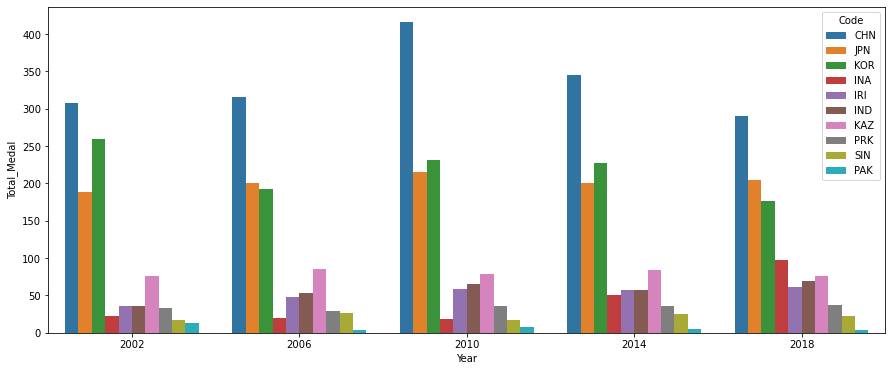

In [17]:
plt.figure(figsize=(15,6))
sns.barplot( x='Year',
    y='Total_Medal',
    hue='Code',
    data=dfQ3)

## Q4- Average medals won by all the countries over a span of 5 Year

In [91]:
cur.execute("SET sql_mode=(SELECT REPLACE(@@sql_mode,'ONLY_FULL_GROUP_BY',''))")

0

In [88]:
cur.execute('''create view avr as(select Year,avg(Gold+Silver+Bronze) over(partition by Year) as Average 
from asian_games) ;''')

0

In [92]:
Q4=pd.read_sql_query("select Year,Average from avr group  by year",myConnection)

In [93]:
dfQ4= pd.DataFrame(Q4)
dfQ4.head()

,Year,Average
0,2002,99.1
1,2006,97.5
2,2010,114.7
3,2014,108.8
4,2018,104.1


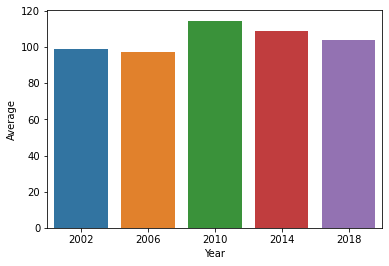

In [94]:
sns.barplot(y=dfQ4.Average ,x=dfQ4.Year)

## Q5- percent rank on total gold medals won by each country, gdp and population


In [40]:
Q5=pd.read_sql_query('''select Country, Code, GDP_per_capita_USD, Population,
round(percent_rank() over(partition by year order by gdp_per_capita_USD ),3) as "GDP_%" ,
round(percent_rank() over(partition by year order by population ),3) as 'Populationrank%'
from All_Data
order by year''',myConnection)

In [61]:
dfQ5= pd.DataFrame(Q5)
dfQ5.head()

,country,Code,GDP_per_capita_USD,population,GDP_%,Populationrank%
0,Singapore,SIN,103180.0,5541000.0,1.000,0.000
1,Kazakhstan,KAZ,28849.0,18906000.0,0.556,0.111
2,North Korea,PRK,44540.0,25863000.0,0.667,0.222
3,South Korea,KOR,44740.0,50617000.0,0.778,0.333
4,Iran,IRI,17661.0,82000000.0,0.333,0.444


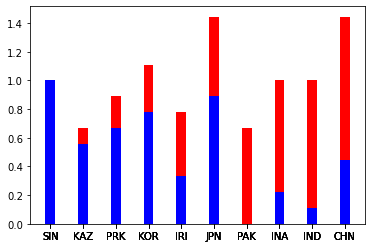

In [48]:
plt.bar(data= dfQ5, x='Code', height='GDP_%',width=0.3, color='b')
plt.bar(data=dfQ5, x='Code', height='Populationrank%',bottom='GDP_%', width=0.3,color='r')
plt.xticks(dfQ5.Code)
plt.show()

## Q7- Compare the increse and decrease in the no of medals won by India and China

In [71]:
Q7a = pd.read_sql_query("select * from diff_val where country like 'China' ", myConnection)
Q7b = pd.read_sql_query("select * from diff_val where country like 'Japan' ", myConnection)
Q7c = pd.read_sql_query("select * from diff_val where country like 'South Korea' ", myConnection)


In [72]:
dfQ7a= pd.DataFrame(Q7a)
dfQ7a

,year,code,country,gold,silver,bronze,Total_Medal,Lag_val,Difference_val
0,2002,CHN,China,150,84,74,308,NaN,NaN
1,2006,CHN,China,165,88,63,316,308.0,8.0
2,2010,CHN,China,199,119,98,416,316.0,100.0
3,2014,CHN,China,151,109,85,345,416.0,-71.0
4,2018,CHN,China,132,92,66,290,345.0,-55.0


In [73]:
dfQ7b= pd.DataFrame(Q7b)
dfQ7b

,year,code,country,gold,silver,bronze,Total_Medal,Lag_val,Difference_val
0,2002,JPN,Japan,44,73,72,189,NaN,NaN
1,2006,JPN,Japan,50,72,78,200,189.0,11.0
2,2010,JPN,Japan,48,74,94,216,200.0,16.0
3,2014,JPN,Japan,47,77,76,200,216.0,-16.0
4,2018,JPN,Japan,75,57,73,205,200.0,5.0


In [74]:
dfQ7c= pd.DataFrame(Q7c)
dfQ7c

,year,code,country,gold,silver,bronze,Total_Medal,Lag_val,Difference_val
0,2002,KOR,South Korea,96,80,84,260,NaN,NaN
1,2006,KOR,South Korea,58,52,83,193,260.0,-67.0
2,2010,KOR,South Korea,76,65,91,232,193.0,39.0
3,2014,KOR,South Korea,79,70,79,228,232.0,-4.0
4,2018,KOR,South Korea,49,58,70,177,228.0,-51.0


In [75]:
dfQ7a.fillna(0)
dfQ7b.fillna(0)
dfQ7c.fillna(0)


,year,code,country,gold,silver,bronze,Total_Medal,Lag_val,Difference_val
0,2002,KOR,South Korea,96,80,84,260,0.0,0.0
1,2006,KOR,South Korea,58,52,83,193,260.0,-67.0
2,2010,KOR,South Korea,76,65,91,232,193.0,39.0
3,2014,KOR,South Korea,79,70,79,228,232.0,-4.0
4,2018,KOR,South Korea,49,58,70,177,228.0,-51.0


Text(0.5, 1.0, 'Difference in medals won')

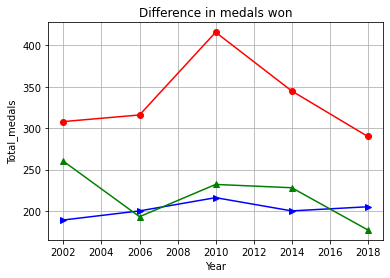

In [76]:
plt.plot(dfQ7a.year, dfQ7a.Total_Medal, marker='o', color='red')
plt.plot(dfQ7b.year, dfQ7b.Total_Medal, marker='>', color='Blue')
plt.plot(dfQ7c.year, dfQ7c.Total_Medal, marker='^', color='Green')

plt.xlabel('Year')
plt.ylabel('Total_medals')

plt.grid(True)
plt.title('Difference in medals won')

In [ ]:
#myConnection.close()